# Importação de bibliotecas

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = (4,3)
plt.style.use("seaborn-whitegrid")

# Importação e visualização dos dados

In [147]:
dataset = pd.read_csv('linear_regression_data.csv',header=None).rename(columns={0:'x',1:'y'})

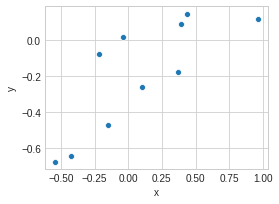

In [148]:
sns.scatterplot(dataset['x'],dataset['y'])
plt.show()

# Pré-processamento dos dados

In [149]:
X = np.hstack([np.ones(dataset.shape[0]).reshape(-1,1),dataset['x'].values.reshape(-1,1)])
y = dataset['y'].values.reshape(-1,1)
n_lin,n_col = X.shape
print('X = \n',X)
print('\ny = \n',y)

X = 
 [[ 1.          0.39293837]
 [ 1.         -0.42772133]
 [ 1.         -0.54629709]
 [ 1.          0.10262954]
 [ 1.          0.43893794]
 [ 1.         -0.15378708]
 [ 1.          0.9615284 ]
 [ 1.          0.36965948]
 [ 1.         -0.0381362 ]
 [ 1.         -0.21576496]]

y = 
 [[ 0.08635962]
 [-0.64387173]
 [-0.67498147]
 [-0.26289158]
 [ 0.14317741]
 [-0.47272884]
 [ 0.1141669 ]
 [-0.18032295]
 [ 0.01182141]
 [-0.07986457]]


# Passo de estimação

## Definições a partir de conhecimentos/experimentos anteriores 

Os momentos da priori $p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mathbf{m_0},\mathbf{S_0})$. 




$\xrightarrow{}$ Definirei $\mathbf{m_0} = [0 \ 0]$ e $\mathbf{S_0} = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix} $

A variância do ruı́do $ p(\epsilon) = \mathcal{N}(\epsilon | 0,\sigma^2) $

$\xrightarrow{}$ Definirei $\sigma^2 = 1$ 

In [172]:
m0 = np.zeros(n_col).reshape(-1,1)
S0 = np.eye((n_col))
sigma_ruido = 0.5

## Cálculo da posteriori de w

$p(\mathbf{w} | \mathcal{D}) = \mathcal{N}(\mathbf{w} | \mathbf{\mu},\mathbf{\Sigma})$

 


$\mathbf{\mu} = \mathbf{m_0} + (\mathbf{S_0}\mathbf{X}^{T}\mathbf{X} + \sigma^2 \mathbf{I})^{-1} \ \mathbf{S_0}\mathbf{X}^{T}(\mathbf{y}-\mathbf{X}\mathbf{m_0})$ ,

In [173]:
#u_1 = np.linalg.inv(S0.dot(X.T).dot(X)) 

u_1 = np.linalg.inv(S0.dot(X.T).dot(X) + np.eye(n_col)*sigma_ruido) 
u_2 = S0.dot(X.T).dot(y - X.dot(m0))
u = m0 + u_1.dot(u_2)
print(u)

[[-0.22210404]
 [ 0.4219028 ]]


$ \mathbf{\Sigma} = \mathbf{S_0} - (\mathbf{S_0}\mathbf{X}^{T}\mathbf{X} + \sigma^2 \mathbf{I})^{-1} \ \mathbf{S_0}\mathbf{X}^{T}\mathbf{X}\mathbf{S_0} $

In [174]:
#sigma_1 = np.linalg.inv(S0.dot(X.T).dot(X) + np.eye(n_col)*sigma_ruido)
sigma_1 = u_1
sigma_2 = S0.dot(X.T).dot(X).dot(S0)
sigma = S0 - sigma_1.dot(sigma_2)
print(sigma)

[[ 0.04909728 -0.01755839]
 [-0.01755839  0.20855857]]


# Passo de predição

Distribuição preditiva

$\xrightarrow{} p(\mathbf{y_*} | \mathbf{X_*}) = \mathcal{N}(\mathbf{y_*} | \mathbf{X_*}\mathbf{\mu} \ , \ \mathbf{X_*}\mathbf{\Sigma}\mathbf{X_*}^{T} + \sigma^2\mathbf{I})$

In [175]:
u_final = X.dot(u).flatten()
#sigma_final = np.diag(X.dot(sigma).dot(X.T))
sigma_final = np.diag(X.dot(sigma).dot(X.T) + np.eye(10)*sigma_ruido)
print('u_final = \n',u_final)
print('\nsigma_final = \n',sigma_final)

u_final = 
 [-0.05632224 -0.40256086 -0.45258831 -0.17880435 -0.03691489 -0.28698724
  0.18356749 -0.06614367 -0.23819381 -0.31313588]

sigma_final = 
 [0.56750011 0.60227233 0.63052379 0.54768997 0.57386544 0.55943029
 0.70815158 0.56461516 0.55073982 0.56638359]


In [176]:
banda = 2 * np.sqrt(sigma_final).reshape(-1,1).flatten()
banda_mais = u_final + banda
banda_menos = u_final - banda

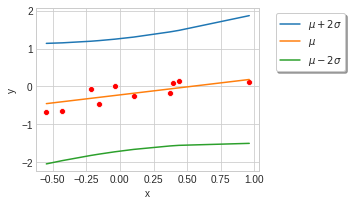

In [177]:
sns.scatterplot(dataset['x'],dataset['y'],color='r')
sns.lineplot(dataset['x'],banda_mais,label='$\mu+2 \sigma$')
sns.lineplot(dataset['x'],u_final,label='$\mu$')
sns.lineplot(dataset['x'],banda_menos,label='$\mu-2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,shadow=True,frameon=True)
plt.show()

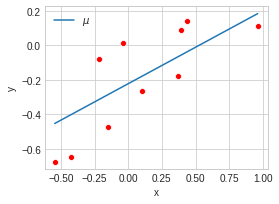

In [178]:
sns.scatterplot(dataset['x'],dataset['y'],color='r')
sns.lineplot(dataset['x'],u_final,label='$\mu$')
